In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train image shape:', train_images.shape)
 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

test_images.shape
train_labels[0]

1.14.0
4423680/4422102 [==============================] - 7s 1us/step
train image shape: (60000, 28, 28)


9

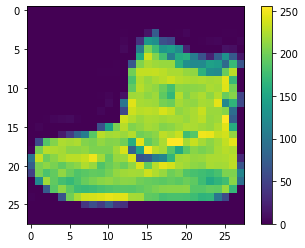

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

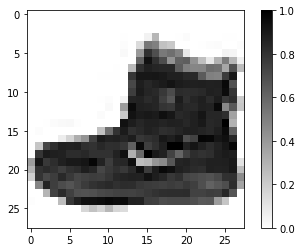

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

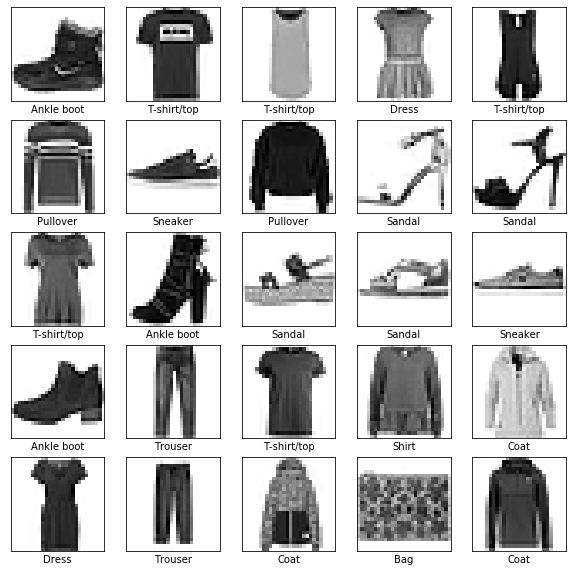

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

W0711 06:48:12.950569 139696599164736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5035 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3788 - acc: 0.8632
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3373 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3154 - acc: 0.8831
Epoch 5/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2957 - acc: 0.8911


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3498 - acc: 0.8718
test accuracy: 0.8718


In [9]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

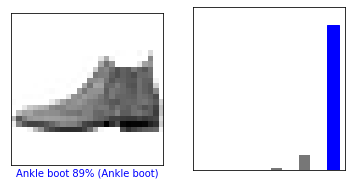

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels) 
plt.show()

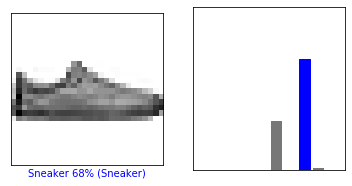

In [12]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

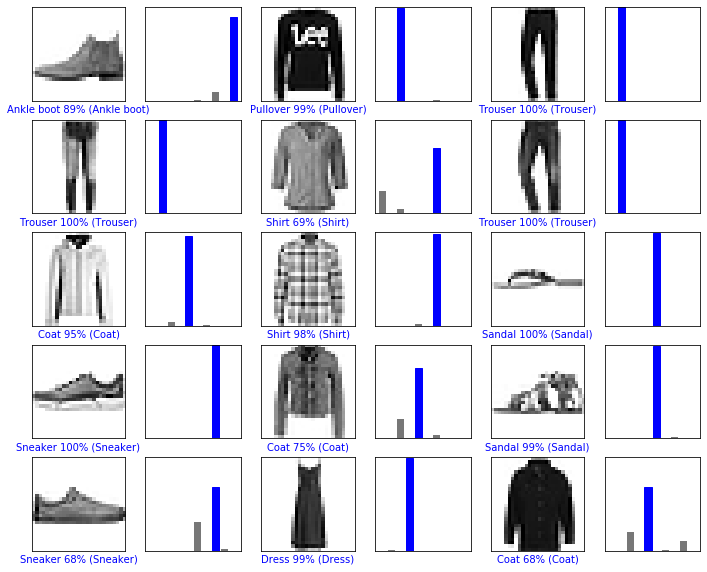

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[1.7779952e-06 8.1882440e-10 3.8008432e-07 1.6208944e-08 2.3559573e-06
  1.1026867e-02 7.1967855e-07 9.5311709e-02 5.7022303e-06 8.9365041e-01]]


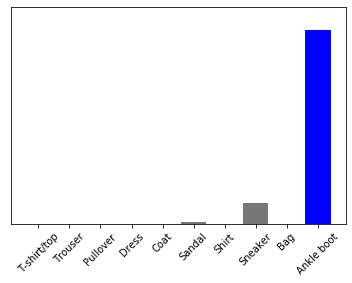

9


In [14]:
#Grab an image from the test dataset
img = test_images[0]
print(img.shape)

#Add the image to the batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)